<a href="https://colab.research.google.com/github/GAURAV-AgarwL/-Predicting-Listing-Gains-in-the-IPO-Market/blob/main/Predicting_Listing_Gains_in_IPO_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/moscmh/indian_ipo_market/main/Indian_IPO_Market_Data.csv")
print(df.shape)
df.head()

(319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [ ]:
for col in df.columns:
  print(col)

Date 
IPOName
Issue_Size
Subscription_QIB
Subscription_HNI
Subscription_RII
Subscription_Total
Issue_Price
Listing_Gains_Percent


In [ ]:
df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Electronics Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


In [ ]:
df['Listing_Gains_Percent'].describe()

,Listing_Gains_Percent
count,319.000000
mean,4.742696
std,47.650946
min,-97.150000
25%,-11.555000
50%,1.810000
75%,25.310000
max,270.400000


In [ ]:
df.isnull().sum()

,0
Date,0
IPOName,0
Issue_Size,0
Subscription_QIB,0
Subscription_HNI,0
Subscription_RII,0
Subscription_Total,0
Issue_Price,0
Listing_Gains_Percent,0


In [ ]:
df['Listing_Gains_Profit'] = np.where(df['Listing_Gains_Percent'] > 0, 1, 0)

In [ ]:
df['Listing_Gains_Profit'].describe()

,Listing_Gains_Profit
count,319.000000
mean,0.545455
std,0.498712
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

,proportion
Listing_Gains_Profit,
1,0.545455
0,0.454545


In [ ]:
df = df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 17.6 KB


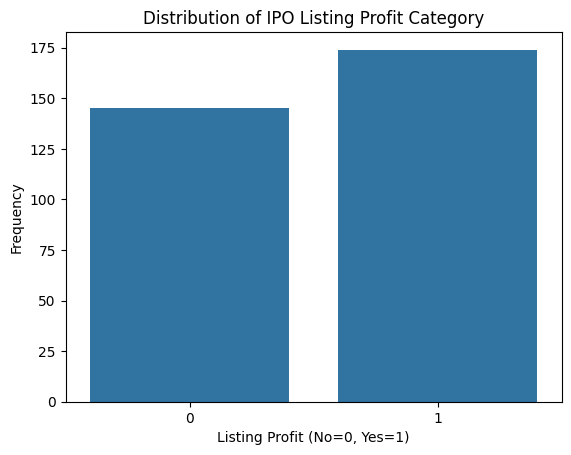

In [ ]:
sns.countplot(x='Listing_Gains_Profit', data=df)
plt.title('Distribution of IPO Listing Profit Category')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.ylabel('Frequency')
plt.show()

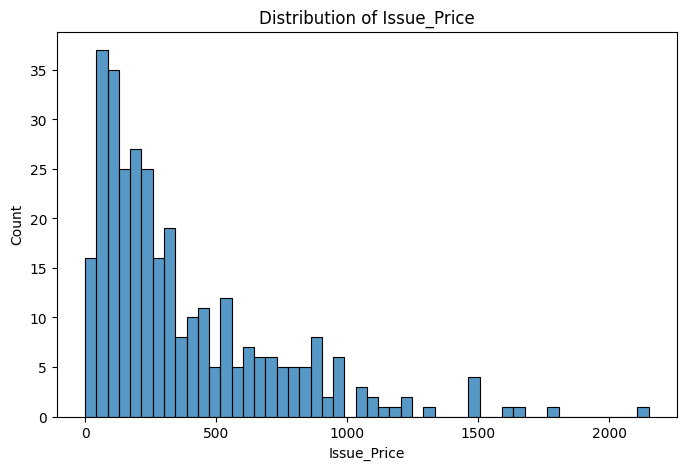

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Price', bins=50).set(title='Distribution of Issue_Price', ylabel='Count')
plt.show()

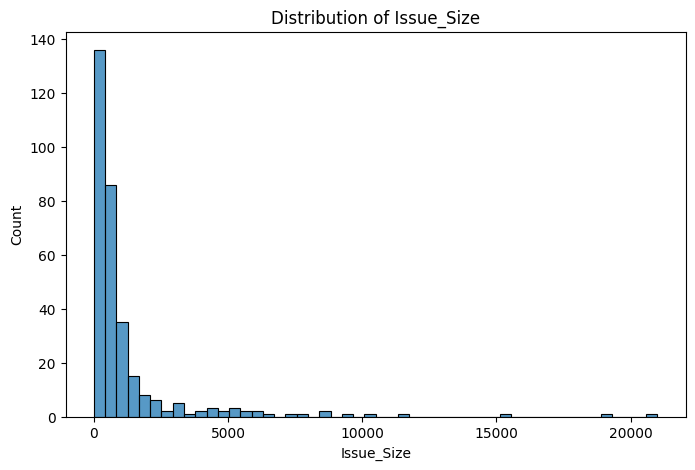

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Size', bins=50).set(title='Distribution of Issue_Size', ylabel='Count')
plt.show()

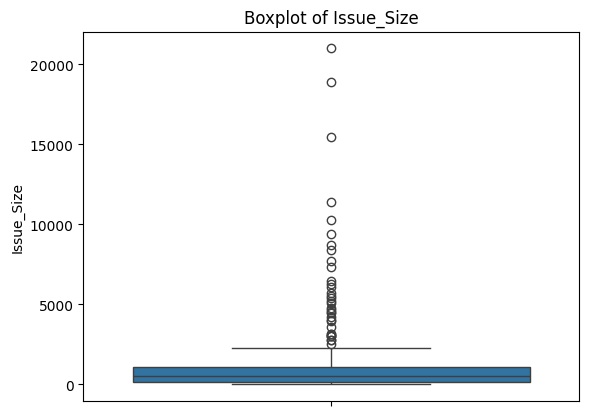

In [ ]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

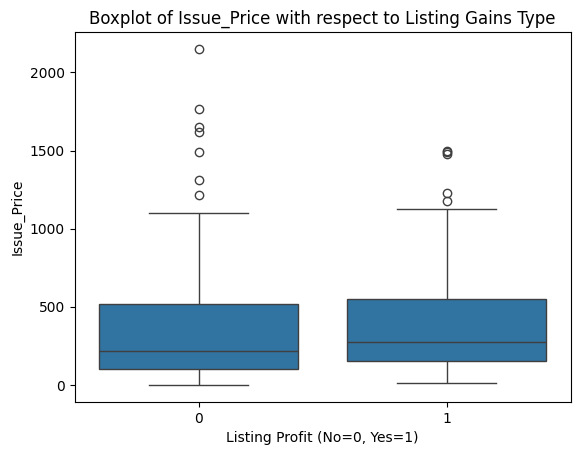

In [ ]:
sns.boxplot(data=df, x='Listing_Gains_Profit', y='Issue_Price')
plt.title('Boxplot of Issue_Price with respect to Listing Gains Type')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.show()

In [ ]:
print(df.skew())

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64


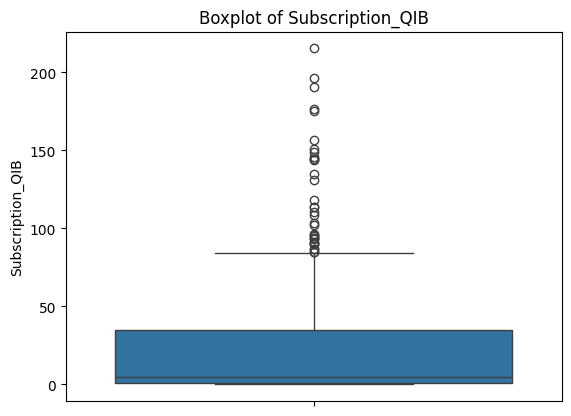

In [ ]:
sns.boxplot(data=df, y='Subscription_QIB')
plt.title('Boxplot of Subscription_QIB')
plt.show()

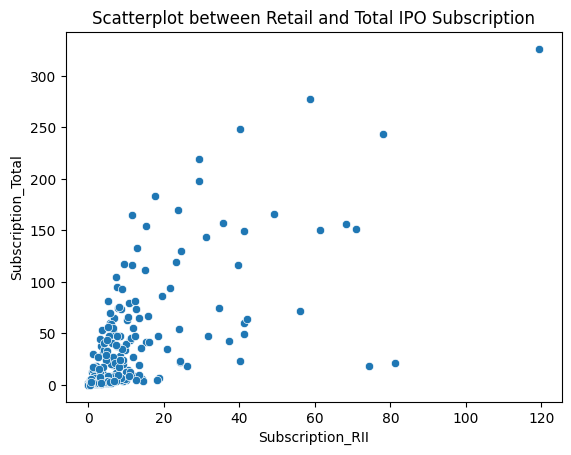

In [ ]:
sns.scatterplot(data=df, x='Subscription_RII', y='Subscription_Total')
plt.title('Scatterplot between Retail and Total IPO Subscription')
plt.show()

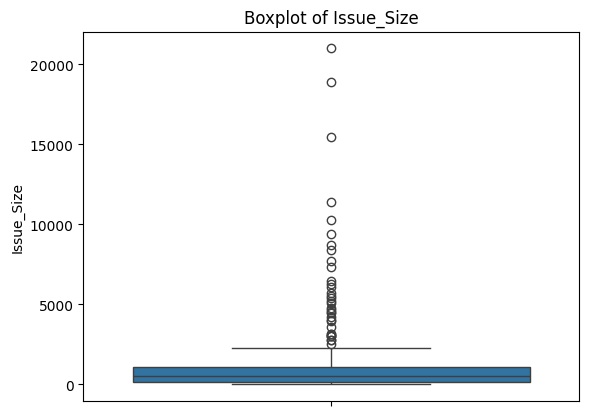

In [ ]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

In [ ]:

q1 = df['Issue_Size'].quantile(q=0.25)
q3 = df['Issue_Size'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 930.995
lower = -1227.4875000000002
upper = 2496.4925000000003


In [ ]:
df['Issue_Size'] = df['Issue_Size'].clip(lower, upper)
df['Issue_Size'].describe()

,Issue_Size
count,319.000000
mean,763.561238
std,769.689122
min,0.000000
25%,169.005000
50%,496.250000
75%,1100.000000
max,2496.492500


In [ ]:
q1 = df['Subscription_QIB'].quantile(q=0.25)
q3 = df['Subscription_QIB'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 33.48500000000001
lower = -49.07750000000001
upper = 84.86250000000001


In [ ]:
df['Subscription_QIB'] = df['Subscription_QIB'].clip(lower, upper)
df['Subscription_QIB'].describe()

,Subscription_QIB
count,319.000000
mean,21.521183
std,29.104549
min,0.000000
25%,1.150000
50%,4.940000
75%,34.635000
max,84.862500


In [ ]:
q1 = df['Subscription_HNI'].quantile(q=0.25)
q3 = df['Subscription_HNI'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 60.839999999999996
lower = -90.005
upper = 153.355


In [ ]:
df['Subscription_HNI'] = df['Subscription_HNI'].clip(lower, upper)
df['Subscription_HNI'].describe()

,Subscription_HNI
count,319.000000
mean,40.356426
std,57.427921
min,0.000000
25%,1.255000
50%,5.070000
75%,62.095000
max,153.355000


In [ ]:
q1 = df['Subscription_RII'].quantile(q=0.25)
q3 = df['Subscription_RII'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 7.33
lower = -9.72
upper = 19.6


In [ ]:
df['Subscription_RII'] = df['Subscription_RII'].clip(lower, upper)
df['Subscription_RII'].describe()

,Subscription_RII
count,319.000000
mean,6.060940
std,6.176882
min,0.000000
25%,1.275000
50%,3.420000
75%,8.605000
max,19.600000


In [ ]:
q1 = df['Subscription_Total'].quantile(q=0.25)
q3 = df['Subscription_Total'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 31.749999999999996
lower = -45.97999999999999
upper = 81.01999999999998


In [ ]:
df['Subscription_Total'] = df['Subscription_Total'].clip(lower, upper)
df['Subscription_Total'].describe()

,Subscription_Total
count,319.000000
mean,20.456646
std,27.217740
min,0.000000
25%,1.645000
50%,4.930000
75%,33.395000
max,81.020000


In [ ]:
target_variable = ['Listing_Gains_Profit']
predictors = list(set(list(df.columns)) - set(target_variable))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.174478,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.055349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.116279,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape); print(X_test.shape)

(223, 6)
(96, 6)


In [ ]:
tf.random.set_seed(100)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.6580 - loss: 0.6905
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5802 - loss: 0.6868 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5255 - loss: 0.6839 
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5633 - loss: 0.6806 
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5438 - loss: 0.6769 
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5286 - loss: 0.6730 
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5251 - loss: 0.6686 
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5251 - loss: 0.6640 
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5251 - loss: 0.6591 
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5251 - loss: 0.6543 
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5286 - loss: 0.6498 
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5346 - lo

In [ ]:
model.evaluate(X_train, y_train)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8232 - loss: 0.4767


[0.47193825244903564, 0.8026905655860901]

In [ ]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6432 - loss: 0.7189


[0.7390953898429871, 0.6458333134651184]